# **Avaliação de Risco de Crédito**

###  <font color = '#a1b56f' > *Analisando, Tratando e criando um modelo de ML*
   *by [Guilherme Lima](https://www.linkedin.com/in/gui-lima-oficial/)*

## **Contexto**
 Uma das maiores preocupações das empresas hoje em dia e a do risco de inadimplência do cliente, que significa que a empresa sede um limite x para o cliente(empréstimo, limite no cartão de crédito, financiamento de casa e/ou carro, etc..) sendo que ele não e confiavel, e gerando assim prejuizos para empresas pois o clientes não vai pagar.

Por isso e muito comum ouvir que as empresas credoras operam em risco, pois não há uma garantia absoluta de que haverá o pagamento do limite cedido, por esssa razão que as empresas vem investimento muito em análise de risco, que consiste em uma analise previa de um banco de dados que cruza as informações do perfil do cliente com o historico de pagamento dele. 

Tendo acesso a esse banco de dados, possibilita que a empresa consiga avaliar o cliente antes mesmo dele ter o primeiro contato com a instituição, pois assim já previne muitas dores de cabeça.

Por isso que a avaliação de risco de crédito e tão importante, pois previne a queda do ganho da empresa, pois ela sabendo que o cliente x e confiavel ela pode seder limites maiores para ele e assim fidelizar o cliente e ganhar mais dinheiro com ele.

Por esse motivo que cada vez mais solução são criadas e aprimoradas para miminizar o risco de Default(Default é o termo 
utilizado para indicar o não cumprimento das obrigações e/ou condições de um empréstimo)
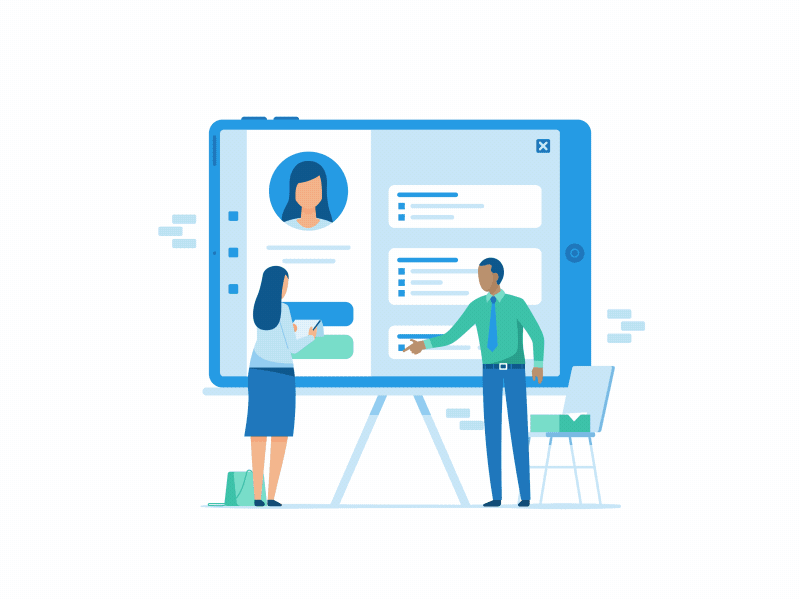

## **Objetivo do projeto**

O objetivo desse projeto vai ser criar um modelo que consiga prever se um cliente vai ser inadimplênte ou não, com foco de resolver esse real problema que acontence até hoje de empresas novas e antigas.

## Fonte de dados

A fonte de dados e um arquivo csv que pode ser baixado aqui *[Link do csv](http://dl.dropboxusercontent.com/s/xn2a4kzf0zer0xu/acquisition_train.csv?dl=0)*, ele consiste em um arquivo com 45 mil linhas e 43 colunas.

## **Considerações finais e Expectativas do projeto.**

Esse projeto veio de uma Startup muito famosa que a Nubank, por ser uma Startup muito reconhecida no Brasil, muitas pessoas querem trabalhar nela, e para fornecer essa oportunidade para as pessoas e em busca de novos talentos a Nubank faz competições que forncece aos campeãos a oportunidade de trabalhar na Startup Nubank.
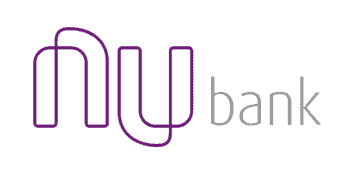
A minha espectativa e criar um bom modelo que consiga fazer esse processo de verificação se o cliente vai ser inadimplênte ou não, e que através desse projeto outras Startups e empresas, possam ver a importancia do Machine Learning(ML) na empresa delas, e assim busque por melhorias cada vez mais robusta para esse problema que ainda nos dia de hoje afeta pequenas e médias empresas que não descobriram ainda o poder do ML.

---

### Etapas do projeto:
- Etapa 1: Importação das bibliotecas necessarias para realizamos as analises, limpezas e transformações nos dados.
    - Importas as principais bibliotecas e mais usadas para analise de dados e machine learning
- Etapa 2: Extração dos dados e Limpeza dos dados.
    - Extrair o dados da minha fonte, verificar as entradas das minhas informações, verificar o tipo de dados, valores faltantes, excluir colunas irrelevantes para o modelo, criação de coluna caso necessario, etc...
- Etapa 3: Analise exploratoria dos dados
    - Parte gráfica do projeto, essa e a parte que vamos criar gráficos, verificar distribuições, correlações, descrição estáticas, entre outras coisas.
- Etapa 4: Enconding dos dados
   - Nessa etapa vamos transformar as colunas que meu modelo de machine learning não consegue ler, valores de texto(pois não é esse nosso objetivo), então caso eu considere que uma coluna de texto é importante eu vou deixar ela e transformar nesta etapa.
- Etapa 5: Aplicação do Modelo de ML e Avalição dele
    - Nessa etapa e a aplicações dos modelos a minha escolha, existe muitos modelos de Ml então vou escolher os quais eu já trabalhei e considero os melhores, espero ter um exelente resultado aqui.
- Etapa 6: Escolhendo o Modelo campeão e melhorar ele
    - Com o modelo aplicado eu escolho o campeão, aquele que teve o maior acerto nas métricas de avaliação que apliquei, e então começo a fazer teste nele, excluindo colunas que considero não tão relevantes, e a etapa de teste mesmo, testa o que faz o modelo melhorar a precisão ou piorar ela. 
- Etapa 7: Conclusão.
    - Etapa de conclusão, está e a etapa final, e onde eu vou tirar minhas conclusões de como foi realizar o projeto, se consegui realizar meu objetivo e se estou sadisfeito com ele.

---

#### Etapa 1: Importação das bibliotecas necessarias

In [1]:
#Bibliotecas principais
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# -----

#Bibliotecas que repartem e testam o modelo.
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
import scikitplot as skplt

#----
#Biblioteca do sklearn que substitui valores nulos.
from sklearn.impute import SimpleImputer


#---
#Bibliotecas de encondig dos dados
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

#---
# filtrando mensagens de warning
import warnings
warnings.filterwarnings('ignore')

#----
#Balancear os dados
from imblearn.under_sampling import RandomUnderSampler

#----
#Modelos de machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

---

#### Etapa 2: Extração dos dados e Limpeza dos dados.

In [2]:
#Lendo meus dados e atribuindo em uma váriavel
df = pd.read_csv('acquisition_train.csv')

In [3]:
#Verificando minhas primeiras entradas
df.head()

,ids,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,...,external_data_provider_fraud_score,lat_lon,marketing_channel,profile_phone_number,reported_income,shipping_state,shipping_zip_code,profile_tags,user_agent,target_fraud
0,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,25033.92,...,645,"(-29.151545708122246, -51.1386461804385)",Invite-email,514-9840782,57849.0,BR-MT,17528,"{'tags': ['n19', 'n8']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
1,bc2c7502-bbad-0f8c-39c3-94e881967124,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,NaN,...,243,"(-19.687710705798963, -47.94151536525154)",Radio-commercial,251-3659293,4902.0,BR-RS,40933,"{'tags': ['n6', 'n7', 'nim']}",Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...,NaN
2,669630dd-2e6a-0396-84bf-455e5009c922,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,7207.92,...,65,"(-28.748023890412284, -51.867279334353995)",Waiting-list,230-6097993,163679.0,BR-RR,50985,"{'tags': ['n0', 'n17', 'nim', 'da']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
3,d235609e-b6cb-0ccc-a329-d4f12e7ebdc1,False,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,510.0,101.599485,0.987673,94.902491,0.32,NaN,...,815,"(-17.520650158450454, -39.75801139933186)",Waiting-list,261-3543751,1086.0,BR-RN,37825,{'tags': ['n4']},Mozilla/5.0 (Linux; Android 6.0; HTC One X10 B...,NaN
4,9e0eb880-e8f4-3faa-67d8-f5cdd2b3932b,False,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,500.0,98.474289,0.532539,118.126207,0.18,NaN,...,320,"(-16.574259446978008, -39.90990074785962)",Invite-email,102-3660162,198618.0,BR-MT,52827,"{'tags': ['pro+aty', 'n19', 'da', 'b19']}",Mozilla/5.0 (Linux; Android 7.0; Pixel C Build...,NaN


#### Remoção de colunas que acredito ser irrelevantes.
 - Para realizar esse processo eu vou pegar as primeiras 1000 mil linhas do meu df e transformar em um arquivo de Excel para facilitar a visualização, já que estamos com tantas colunas, e partindo do ponto que eu acredito que aja muitas colunas que não vão agregar valor ao meu Modelo de classificação.
- Qual o meu criterio de remoção de colunas?
    - O meu criterio vai ser meu objetivo, todas as colunas que eu achar que não tem relevancia para chegar até o meu objetivo eu vou excluir.

In [4]:
#Pegando as minhas 1000 mil linhas
arquivo_coluanas = df[:1000]

#transformando em arquivo de excel

#arquivo_coluanas.to_excel('Escolher_colunasv2.xlsx',index=False)

- Quais colunas eu vou remover dos projeto?

    - Coluna de ID: Sem relevancia, pois são valores aleatorios.
    - Coluna de Reason: Está codificada e não parece ter relação com meu objetivo estando assim.
    - Informações da pessoa: Pois estão codificadas e não tem relação aparente com meu objetivo
       - Ex: state, zip, channel, job_name, real_state
    - Coluna de application_time_applied: Pois, o tempo de aplicação acredito que nao vá impactar no meu modelo.
    - Coluna de email: Pois, não tem relação com meu objetivo.
    - Coluna de external_data_provider_credit_checks_last_2_year: Pois, todos os valores são 0 e o resto está vazio, então posso excluir, sem medo de perder informação.
    - Coluna de external_data_provider_credit_checks_last_year: Pois, já tenho a coluna do last_month e vou manter ela, essa do last_year, parece ser relavante mas tem 15 mil valores nulos também, talves seja por falta de cadrastramento adequado, então vou escolher excluir de primeiro momento, depois no futuro posso reconsiderar.
    - Coluna de external_data_provider_first_name: Pois, parece não ter relação com meu objetivo.
    - Coluna de lat_lon: Pois, parece não ter relação com meu objetivo, por que o lugar onde a pessoa mora não define se ela vai se inadiplente ou não, acredito eu.
    - Colunas de marketing_channel e profile_phone_number: Sem relação aparente com meu objetivo também.
    - Colunas de shipping_state e shipping_zip_code: Não parecem ter relação com meu objetivo.
    - Colunas de profile_tags, user_agent e target_fraud, external_data_provider_first_name: Pois, não parecem ter relação com meu objetivo.

- BLOCO DE TESTE DAS COLUNAS

In [5]:
#Verificando a quantidade de valores na coluna.
df['external_data_provider_credit_checks_last_year'].value_counts()

1.0    15039
0.0    14837
Name: external_data_provider_credit_checks_last_year, dtype: int64

In [6]:
#Verificar a quantidade de valores nulos
df['external_data_provider_credit_checks_last_year'].isnull().sum()

15124

---

#### Resultado:
- Depois de uma analise qualitativa, realizando analises coluna por coluna, eu resolvir ficar com 23 colunas que acredito ser as mais relevantes para o desenvolvimento de um bom modelo.

---

In [7]:
#Criando uma copia dos dados, para não modificar o original
inadiplencia_df = df.copy()

#Colunas que resolvi manter no projeto.
colunas = ['target_default','score_1','score_2','score_3','score_4','score_5','score_6','risk_rate','last_amount_borrowed','last_borrowed_in_months','credit_limit','income','facebook_profile','ok_since','n_bankruptcies','n_defaulted_loans','n_accounts','n_issues','application_time_in_funnel','external_data_provider_credit_checks_last_month','external_data_provider_email_seen_before','external_data_provider_fraud_score','reported_income']

inadiplencia_df = inadiplencia_df[colunas]

#Primeiras linhas do meu Dataframe 
inadiplencia_df.head()


,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,...,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_in_funnel,external_data_provider_credit_checks_last_month,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income
0,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,25033.92,36.0,...,NaN,0.0,0.0,18.0,18.0,444,2,51.0,645,57849.0
1,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,NaN,NaN,...,50.0,0.0,0.0,14.0,14.0,346,1,17.0,243,4902.0
2,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,7207.92,36.0,...,NaN,0.0,0.0,10.0,NaN,6,2,9.0,65,163679.0
3,False,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,510.0,101.599485,0.987673,94.902491,0.32,NaN,NaN,...,NaN,1.0,0.0,19.0,19.0,406,3,38.0,815,1086.0
4,False,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,500.0,98.474289,0.532539,118.126207,0.18,NaN,NaN,...,NaN,0.0,0.0,11.0,NaN,240,2,46.0,320,198618.0


In [8]:
#Verificando os valores nulos do meu dataframe
inadiplencia_df.isnull().sum()

target_default                                      3259
score_1                                              562
score_2                                              562
score_3                                              562
score_4                                                0
score_5                                                0
score_6                                                0
risk_rate                                            562
last_amount_borrowed                               29956
last_borrowed_in_months                            29956
credit_limit                                       13800
income                                               562
facebook_profile                                    4458
ok_since                                           26545
n_bankruptcies                                       697
n_defaulted_loans                                    574
n_accounts                                           562
n_issues                       

- Como podemos notar, existe muitos valores nulos que precisam ser excluidos e substituidos, pois muitos desses valores como por exeplo da coluna de last_amount_borrowed, são de pessoas que nunca pediram um emprestimo, ou seja, sempre estiveram OK!, tendo isso em mente não podemos simplesmente excluir dos nossos dados os clientes que nunca fizeram um emprestimo, pois assim estariamos tirando a capacidade do modelo aprender, então em casos assim vamos substituir. 

In [9]:
#Tipos dos dados.
inadiplencia_df.dtypes

target_default                                      object
score_1                                             object
score_2                                             object
score_3                                            float64
score_4                                            float64
score_5                                            float64
score_6                                            float64
risk_rate                                          float64
last_amount_borrowed                               float64
last_borrowed_in_months                            float64
credit_limit                                       float64
income                                             float64
facebook_profile                                    object
ok_since                                           float64
n_bankruptcies                                     float64
n_defaulted_loans                                  float64
n_accounts                                         float

In [10]:
#Informação estáticas dos dados
inadiplencia_df.describe()

,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_in_funnel,external_data_provider_credit_checks_last_month,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income
count,44438.000000,45000.000000,45000.000000,45000.000000,44438.000000,15044.000000,15044.000000,31200.000000,4.443800e+04,18455.000000,44303.000000,44426.000000,44438.000000,33456.000000,45000.000000,45000.000000,42767.000000,45000.000000,45000.00
mean,347.983258,100.006797,0.500037,99.925228,0.296717,13782.341991,41.763893,34381.951154,7.160739e+04,35.069737,0.076270,0.004569,10.696701,11.068119,247.537000,1.501067,12.534781,500.399800,inf
std,110.429165,3.178080,0.288326,10.016549,0.101933,8077.571933,10.252705,36586.982218,5.185897e+04,21.663194,0.274052,0.079400,4.592463,4.595501,146.118398,1.114941,126.530487,287.968873,NaN
min,0.000000,86.191572,0.000035,60.663039,0.000000,1005.180000,36.000000,0.000000,4.821180e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-999.000000,0.000000,403.00
25%,270.000000,97.867036,0.252150,93.198353,0.220000,7519.502500,36.000000,10000.000000,4.501078e+04,17.000000,0.000000,0.000000,7.000000,8.000000,120.000000,1.000000,11.000000,252.000000,50948.25
50%,340.000000,100.018900,0.500753,99.974796,0.290000,12023.465000,36.000000,25647.000000,6.126676e+04,32.000000,0.000000,0.000000,10.000000,10.000000,248.000000,2.000000,27.000000,503.000000,101779.00
75%,420.000000,102.141797,0.748816,106.640275,0.360000,19220.270000,36.000000,47086.750000,8.601923e+04,50.000000,0.000000,0.000000,13.000000,14.000000,375.000000,2.000000,43.000000,747.000000,151337.25
max,990.000000,113.978234,0.999973,142.192400,0.900000,35059.600000,60.000000,448269.000000,5.000028e+06,141.000000,5.000000,5.000000,49.000000,49.000000,500.000000,3.000000,59.000000,1000.000000,inf


- Analises que tiramos da tabela descritiva:
    - Como podemos nota, na nossa de coluna de external_data_provider_email_seen_before temos um valor de -999.0000..., bem esse valor pode ter sido algo que eles colocaram para diminuir a relevancia da coluna(uma hipotese) ou o mais provavel foi algum erro de cadastramento do resultado.
    - E que também existe valor inf(infinito) na minha reported_income que deve ser um erro de cadrastramento de resultado.
- Qual os passo que vou usar para tratar o erro?
    - O Valor de -999.0... vou substiir por NaN que e um valor que pode ser tratado, por exemplo com uma biblioteca de substituir valores nulos.
    - E o inf eu vou fazer a mesma coisa vou substituir por NaN
           

In [11]:
#Substituindo o valor de inf para Nan na coluna reported_income
inadiplencia_df['reported_income'] = inadiplencia_df['reported_income'].replace(np.inf, np.nan)

In [12]:
#Substituindo o valor de -999... por NaN da coluna external_data_provider_email_seen_before
inadiplencia_df['external_data_provider_email_seen_before'] = inadiplencia_df['external_data_provider_email_seen_before'].replace(np.inf, 
                                                                                                                                  np.nan)

In [13]:
#Excluindo os valores nulos de target_default, pois são valores que se eu alterar eu vou perder a estrutura do meu projeto.
inadiplencia_df.dropna(subset=['target_default'],inplace=True)

In [14]:
#Separando meus dados entre dados numericos e categoricos(objects)
num_df = inadiplencia_df.select_dtypes(exclude='object').columns
cat_df = inadiplencia_df.select_dtypes(include='object').columns

In [15]:
#Subsituindo valores ausentes, colunas de emprestimo.
inadiplencia_df['last_amount_borrowed'].fillna(value=0,inplace=True)
inadiplencia_df['last_borrowed_in_months'].fillna(value=0,inplace=True)
inadiplencia_df['n_issues'].fillna(value=0,inplace=True)

In [16]:
#Subsituindo valores ausentes das colunas numericas, com um modelo do sklearn

#Istancia do modelo
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

#Treinando o medelo
imputer = imputer.fit(inadiplencia_df.loc[:,num_df])

#Transformando meus dados
inadiplencia_df.loc[:,num_df] = imputer.transform(inadiplencia_df.loc[:,num_df])

In [17]:
#Subsituindo valores ausentes das colunas categoricas, com um modelo do sklearn

#Istancia do modelo
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent', )

#Treinando o medelo
imputer = imputer.fit(inadiplencia_df.loc[:,cat_df])

#Transformando meus dados
inadiplencia_df.loc[:,cat_df] = imputer.transform(inadiplencia_df.loc[:,cat_df])

In [18]:
#Revendo a quantidade de valores nulos.
inadiplencia_df.isnull().sum()

target_default                                     0
score_1                                            0
score_2                                            0
score_3                                            0
score_4                                            0
score_5                                            0
score_6                                            0
risk_rate                                          0
last_amount_borrowed                               0
last_borrowed_in_months                            0
credit_limit                                       0
income                                             0
facebook_profile                                   0
ok_since                                           0
n_bankruptcies                                     0
n_defaulted_loans                                  0
n_accounts                                         0
n_issues                                           0
application_time_in_funnel                    

In [19]:
#Linhas e colunas dos meus dados
inadiplencia_df.shape

(41741, 23)

---

- E assim finalizamos o processo de extração e limpeza dos dados.
    - O que fizemos nessa etapa?
            - Removemos colunas irrelevantes para o nosso objetivo.
            - Removendo linhas faltantes que não poderiam ser substituidas
            - Tratamos os valores nulos subsitituindo eles.

---

#### Etapa 3: Analise exploratoria dos dados

In [20]:
#Informações estataticas das minhas colunas
inadiplencia_df.describe()

,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_in_funnel,external_data_provider_credit_checks_last_month,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income
count,41741.000000,41741.000000,41741.000000,41741.000000,41741.000000,41741.000000,41741.000000,41741.00000,4.174100e+04,41741.000000,41741.000000,41741.000000,41741.000000,41741.000000,41741.000000,41741.000000,41741.000000,41741.000000,4.174100e+04
mean,346.459836,100.006820,0.499416,99.919399,0.294451,4512.735564,13.742747,31156.17242,7.108012e+04,33.321195,0.076448,0.004624,10.639108,8.139096,247.748545,1.504396,13.443928,500.491771,1.050597e+13
std,110.102271,3.183821,0.288085,10.022703,0.101561,7811.069725,19.977492,30202.18905,5.225978e+04,14.003467,0.274410,0.080145,4.588175,6.251065,146.326172,1.114207,122.570650,287.993121,2.581896e+14
min,0.000000,86.191572,0.000035,60.663039,0.000000,0.000000,0.000000,0.00000,4.821180e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-999.000000,0.000000,4.030000e+02
25%,270.000000,97.862546,0.251595,93.182517,0.220000,0.000000,0.000000,17331.00000,4.401958e+04,32.000000,0.000000,0.000000,7.000000,0.000000,120.000000,1.000000,12.000000,252.000000,5.091000e+04
50%,340.000000,100.017950,0.500174,99.977774,0.290000,0.000000,0.000000,25213.00000,6.004409e+04,32.000000,0.000000,0.000000,10.000000,9.000000,248.000000,2.000000,27.000000,502.000000,1.014210e+05
75%,420.000000,102.143100,0.747630,106.630991,0.360000,7510.600000,36.000000,34997.00000,8.503289e+04,32.000000,0.000000,0.000000,13.000000,12.000000,375.000000,2.000000,43.000000,747.000000,1.510430e+05
max,990.000000,113.978234,0.999973,142.192400,0.900000,35059.600000,60.000000,448269.00000,5.000028e+06,141.000000,5.000000,5.000000,49.000000,49.000000,500.000000,3.000000,59.000000,1000.000000,6.355500e+15


---

<AxesSubplot:>

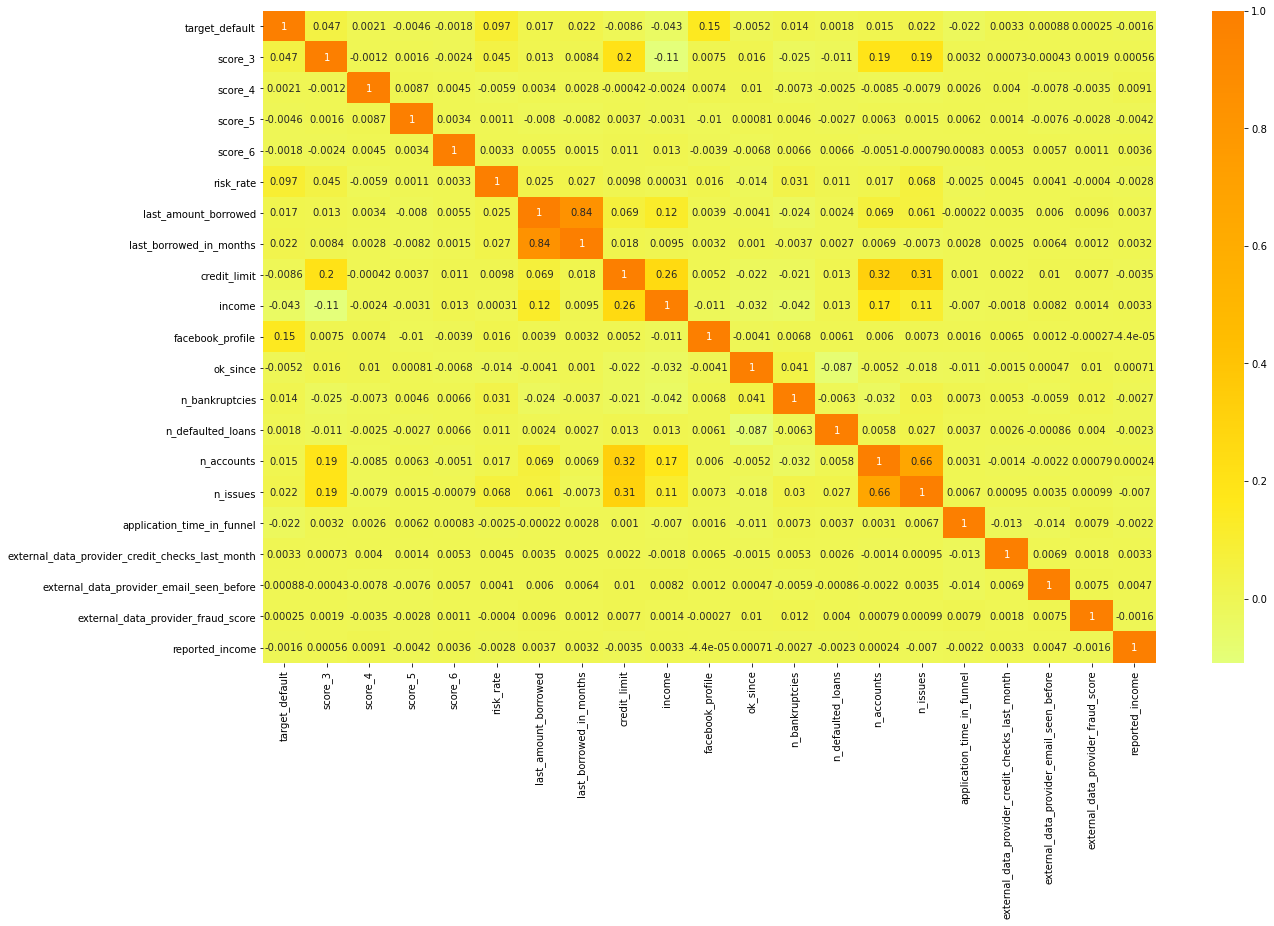

In [21]:
#Verificando a correlação das minhas informações
plt.figure(figsize=(20,12))
sns.heatmap(inadiplencia_df.corr(), cmap='Wistia',annot=True)

- Como podemos analisar, existe uma correlação muito forte entre o numero de last_amount_borrowed e last_borrowed_in_months, ou seja, quando uma aumenta a outra aumenta também.

- Outras colunas que tem o mesmo comportamento são n_accounts e n_isssues, algo que faz sentido pois quanto mais contas a pessoa tem, mais problemas ela tende a ter, então nesse caso eu vou deixar essa coluna assim, depois eu posso escolher retirar ela do modelo para ver como fica sem ela, na Etapa de melhorias do modelo.
  - E a colunas dlast_amount_borrowed e last_borrowed_in_months o que vamos fazer?
        - nesse caso eu vou escolher excluir a coluna de last_borrowed_in_months, pois vale mais apena ver pelo valor do emprestimo do que pelo mes em si, e como as duas colunas falam da mesma coisa praticamente, deixar ela no meu conjunto de dados e um perigo, pois o modelo pode interpreta de maneira equivocada esses dados, e achar que tudo gira em torno deles, então vamos evitar isso.

In [22]:
#Excluindo a coluna de last_borrowed_in_months
inadiplencia_df.drop('last_borrowed_in_months',axis=1,inplace=True)

---

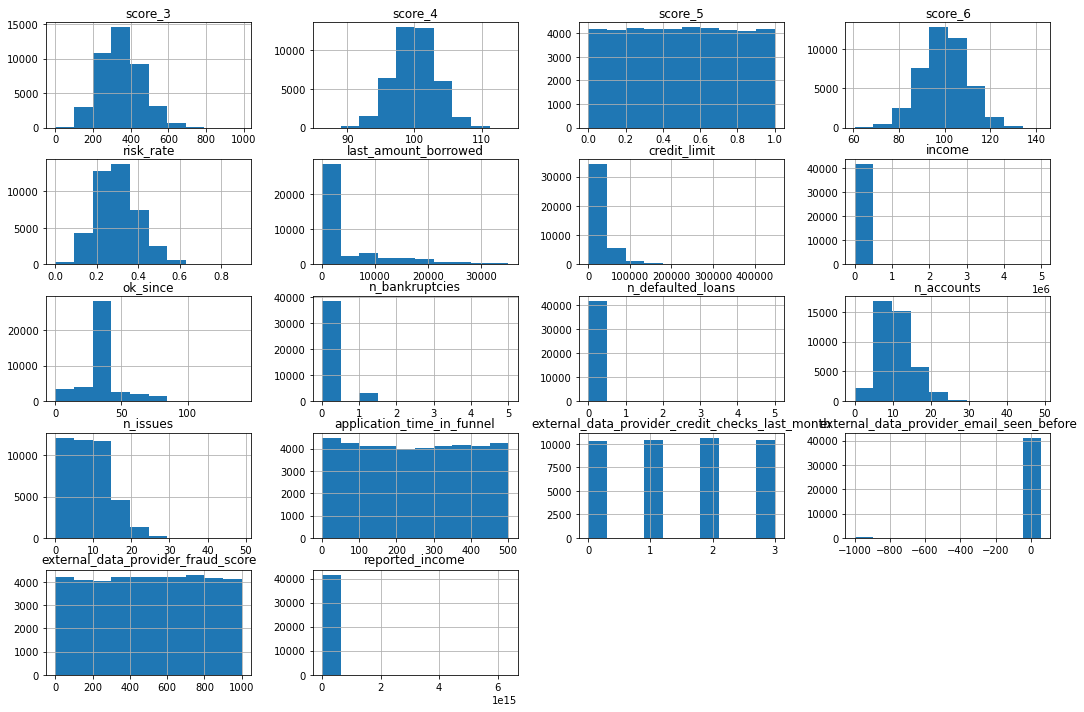

In [23]:
#Verificando a distribuição das minhas variaveis
inadiplencia_df.hist(figsize=(18,12));

- Como podemos notar, existem muitos outliers em algumas colunas, porém como estamos trabalhando com o objetivo de saber se a pessoa vai ser inadimplênte ou não, retirar esses valores seria insensato, pois pela quantidade de linhas que temos, qualquer informações que percamos será de grande importancia, então vamos seguir em frente assim mesmo.

---

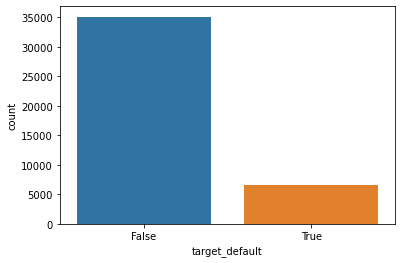

In [24]:
#Verificando em forma grafica meus valores alvo que são da coluna target_default
sns.countplot(inadiplencia_df['target_default']);

- Como podemos notar, estamos lidando com valores desbalanceados, já que os valores de False são bem maiores do que os de True, ëntão o modelo pode gerar metricas que não representam o mundo real.

---

- Mesmo existindo outras visualizações que possamos fazer, vamos focar no objetivo que e a construção do modelo, então vamos para parte de enconding dos dados e depois o balanceamento, pois como podemos ver, os dados estão bem desbalanceados.

---

#### Etapa 4: Enconding dos dados
- Nesta etapa nos vamos:
    - 1: Normalizar os valores numericos, para melhorar o desempenho do modelo.  
    - 2: Modiacar as variaveis de categoria(object) de um modo que o meu modelo consiga ler e aprender com elas.
    - 3: Modificar a coluna de target_default para 0 quando for False e 1 quando for Verdadeiro, para facilitar a aprendizagem do modelo.

In [25]:
#Criando uma copia dos nossos dados, já que vamos realizar modificações.
inadiplencia_cod = inadiplencia_df.copy()

In [26]:
#Normalizando as colunas numericas

#Obtendo as colunas númericas.
colunas_num = inadiplencia_cod.drop('target_default', axis=1).select_dtypes(exclude='object').columns

#Noermalizando
inadiplencia_cod[colunas_num] = StandardScaler().fit_transform(inadiplencia_cod[colunas_num].values)


In [27]:
#Modificando as variaveis categoricas

#Criando outra copia dos dados.
final_df = inadiplencia_cod.copy()

#Selecionando as colunas de categoria
cate_cols = final_df.select_dtypes('object').columns


#Codificando cada coluna de categoria
for coluna in cate_cols:
    final_df[coluna+'_encoded'] = LabelEncoder().fit_transform(final_df[coluna])
    #Removendo a coluna extra que ele gera
    final_df.drop(coluna,axis=1,inplace=True)

In [28]:
#Modificando os valores de target_default

#Modificando o target_default
final_df.loc[final_df['target_default'] == True, 'target_default'] = 1
final_df.loc[final_df['target_default'] == False, 'target_default'] = 0

In [29]:
#Verificando a coluna de target_default
print(final_df['target_default'].value_counts());

0    35080
1     6661
Name: target_default, dtype: int64


In [30]:
#Modificando o tipo dele para inteiro
final_df['target_default'] = final_df['target_default'].astype(int)

---

- E assim terminamos o nosso processo de encondig, agora e aplicar o modelo.
- Nessa etapa eu:
    - Normalizei as variaveis numericas
    - Modifiquei as colunas categorias de um modo que o modelo conseguisse ler
    - Modiquei a coluna target_default para 0 e 1 para facilitar a aprendizagem do modelo e modifiquei o tipo de dado dele.

---

#### Etapa 5: Aplicação do Modelo de ML e Avaliando ele

In [31]:
#Criando uma função que vai avaliar o modelo

def Avaliarmodelo(nome_modelo, y_test, previsao):
    sk = skplt.metrics.plot_confusion_matrix(y_test, previsao, normalize=True) #heatmap, vamos ver apenas para o modelo campeão.
    cm = classification_report(y_test, previsao, digits=4)
    ac = accuracy_score(y_test,previsao)
    roc = roc_auc_score(y_test, previsao)
    return sk, print(f'O Modelo: {nome_modelo}\nRelatório de Classificação:\n{cm}\nAcurácia: {ac:.4f}\nAUC: {roc:.4f}\n')

In [32]:
#Dividindo minha base entre x e y

#X são valores que vou usar para chegar no y
x = final_df.drop('target_default', axis=1).select_dtypes(exclude='object')

#Variavel destino e o y
y = final_df['target_default']

#Separando em dados de treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=10)

In [33]:
#Criando uma instancia para os modelos
modelo_rf = RandomForestClassifier()
modelo_dc = DecisionTreeClassifier()
modelo_lc = LogisticRegression()
modelo_ex = ExtraTreeClassifier()
modelo_nb = GaussianNB()
modelo_kn = KNeighborsClassifier()
modelo_svm = SVC()
modelo_xg = XGBClassifier(learning_rate=0.01, n_estimators=1000,
                         max_depth=3, subsample = 0.9,
                         colsample_bytree = 0.1, gamma=1,
                         random_state=42
)

#Criando um dicionario para acessar de maneira mais facil

modelos = {
    #'RandomForest Classifier':modelo_rf,
    #'Decision Tree Classifier':modelo_dc,
    #'Logistic Regression': modelo_lc,
    #'Extra Tree Classifier': modelo_ex,
    'Gaussian NB':modelo_nb,
    #'KNeighbors Classifier':modelo_kn,
    #'SVC':modelo_svm,
    #'XGB Classifier':modelo_xg
}

O Modelo: Gaussian NB
Relatório de Classificação:
              precision    recall  f1-score   support

           0     0.8441    0.9764    0.9054      8742
           1     0.3622    0.0691    0.1160      1694

    accuracy                         0.8291     10436
   macro avg     0.6031    0.5228    0.5107     10436
weighted avg     0.7658    0.8291    0.7773     10436

Acurácia: 0.8291
AUC: 0.5228



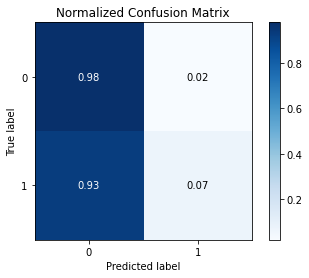

In [34]:
#Percorrendo minha lista de modelos
for nome_modelo,Modelo in modelos.items():
    #Treinando modelo
    Modelo.fit(x_train, y_train)
    
    #Prevendo com o modelo
    previsao = Modelo.predict(x_test)
    
    #Avaliando o modelo
    Avaliarmodelo(nome_modelo,y_test,previsao)

---

#### TOP 3 MODELOS

- O Modelo: Gaussian NB
- Relatório de Classificação:
              precision    recall  f1-score   support

       False     0.8467    0.9731    0.9055      8742
        True     0.3959    0.0909    0.1479      1694

-    accuracy:                         0.8299     10436
-    macro avg     0.6213    0.5320    0.5267     10436
- weighted avg     0.7735    0.8299    0.7825     10436
---
- Acurácia: 0.8299
- AUC: 0.5320

---

- O Modelo: RandomForest Classifier
- Relatório de Classificação:
               precision    recall  f1-score   support

       False     0.8402    0.9966    0.9117      8742
        True     0.5522    0.0218    0.0420      1694

-    accuracy                         0.8383     10436
-   macro avg     0.6962    0.5092    0.4769     10436
- weighted avg     0.7935    0.8383    0.7706     10436
---
- Acurácia: 0.8383
- AUC: 0.5092

---

- O Modelo: Logistic Regression
- Relatório de Classificação:
              precision    recall  f1-score   support

       False     0.8377    0.9999    0.9117      8742
        True     0.5000    0.0006    0.0012      1694

-    accuracy                         0.8377     10436
-    macro avg     0.6689    0.5002    0.4564     10436
- weighted avg     0.7829    0.8377    0.7639     10436

- Acurácia: 0.8377
- AUC: 0.5002

---

#### Etapa 6: Escolhendo o Modelo campeão e melhorar ele

- Eu vou ficar com o modelo Gaussian NB, pois ele foi o que mais conseguiu acertar os valores quando era Verdadeiro, os outros modelos conseguiam acertar praticamente tudo quando era False, mas quando era True eles tambem erravam tudo, então eu vou ficar com o modelo que pelo menos conseguiu acertar 0.09 dos dados quando são True

---

O Modelo: Gaussian NBB
Relatório de Classificação:
              precision    recall  f1-score   support

           0     0.8441    0.9764    0.9054      8742
           1     0.3622    0.0691    0.1160      1694

    accuracy                         0.8291     10436
   macro avg     0.6031    0.5228    0.5107     10436
weighted avg     0.7658    0.8291    0.7773     10436

Acurácia: 0.8291
AUC: 0.5228



(<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>,
 None)

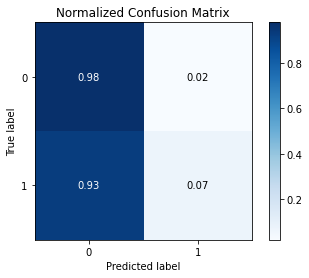

In [37]:
#Dividindo minha base entre x e y

#X são valores que vou usar para chegar no y
x = final_df.drop('target_default', axis=1).select_dtypes(exclude='object')

#Variavel destino e o y
y = final_df['target_default']

#Separando em dados de treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=10, test_size=0.25)

#Modelo Campeão
modelo_nb = GaussianNB()

#Treinando o modelo campeão
modelo_nb.fit(x_train, y_train)
    
#Fazendo previsoes com o modelo campeão
previsao = modelo_nb.predict(x_test)
    
#Avaliando o resultado de cada modelo
Avaliarmodelo('Gaussian NBB', y_test, previsao)

---

- Analisando o resultado e como já foi mencionado acima, o Gaussian NBB foi o melhor modelo conseguindo acertar em quase 7% dos casos quando são False, algo exelente em meio a tantos outros modelos que não conseguiam acertar nada.
- Vale relembrar que os dados são desbalanceados, e então não podemos tomar uma decisão certa sobre o resultado, porém serve como baseline.

---

#### Etapa 7: Conclusão.


- Como podemos notar conseguimos achar até que um modelo não tão ruim, pois comparado com os outros ele foi exelente!, então fico sadisfeito com meu projeto, claro que não conseguimos criar algo extramamente preciso, mas conseguimos ao menos ter uma base de onde possamos seguir em frente, pois resultados melhores do que esse vão nos dizer que temos um modelo melhor.

- Obrigado.